<a href="https://colab.research.google.com/github/nithinag10/machine_learning/blob/main/Linear_regression_using__different_optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Reading

In [5]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Visualisation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.price.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [ ]:
car_companies = df['CarName'].str.split(" ").str[0].unique()

In [ ]:
car_companies_count = []
for i in car_companies:
  car_companies_count.append(len((df['CarName'].str.split(" ").str[0] == i )))
print(car_companies_count)

[205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205]


In [ ]:
df['fueltype'].unique()


array(['gas', 'diesel'], dtype=object)

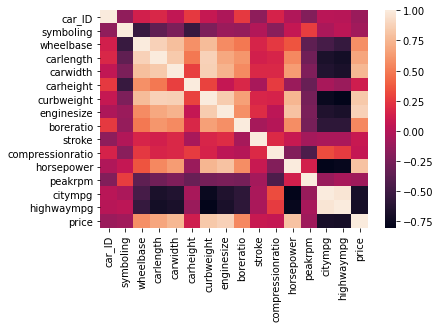

<Figure size 2160x2160 with 0 Axes>

In [ ]:

  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr())
plt.figure(figsize=(30,30))
# displaying heatma
plt.show()

In [ ]:
# gas car average price
n = len(df.loc[df['fueltype'] == 'gas'].price)
sum = df.loc[df['fueltype'] == 'gas'].price.sum()
average_gas = sum/n
average_gas = round(average_gas)

13000

In [ ]:
# diesel car average price
n = len(df.loc[df['fueltype'] == 'diesel'].price)
sum = df.loc[df['fueltype'] == 'diesel'].price.sum()
average_diesel = sum/n
average_diesel = round(average_diesel)


In [ ]:
average_diesel

15838

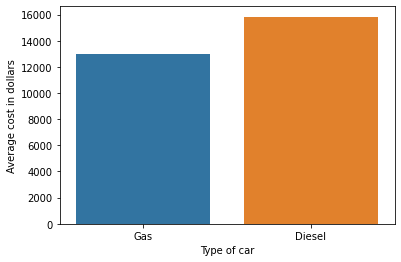

In [ ]:
sns.barplot(x= ['Gas' , 'Diesel'] ,y=[average_gas , average_diesel])
plt.xlabel('Type of car')
plt.ylabel("Average cost in dollars")
plt.show()

In [ ]:
val = df['drivewheel'].value_counts()

In [ ]:
val

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [ ]:
# fwd car average price
n = len(df.loc[df['drivewheel'] == 'fwd'].price)
sum = df.loc[df['drivewheel'] == 'fwd'].price.sum()
average_fwd = sum/n
average_fwd = round(average_fwd)
# rwd car average price
n = len(df.loc[df['drivewheel'] == 'rwd'].price)
sum = df.loc[df['drivewheel'] == 'rwd'].price.sum()
average_rwd = sum/n
average_rwd = round(average_rwd)
# 4wd car average price
n = len(df.loc[df['drivewheel'] == '4wd'].price)
sum = df.loc[df['drivewheel'] == '4wd'].price.sum()
average_4wd = sum/n
average_4wd = round(average_4wd)

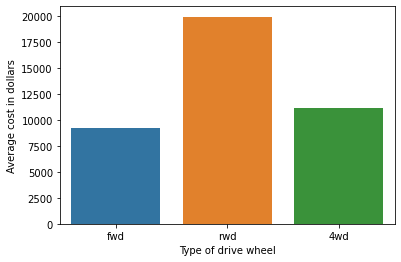

In [ ]:
sns.barplot(x= ['fwd' , 'rwd' , '4wd'] ,y=[average_fwd ,average_rwd , average_4wd])
plt.xlabel('Type of drive wheel')
plt.ylabel("Average cost in dollars")
plt.show()

In [ ]:
fuel_system_label = df['fuelsystem'].unique()
fuel_system_average_price = []

In [ ]:
for fuel_system in fuel_system_label:
  n = len(df.loc[df['fuelsystem'] == fuel_system].price)
  sum = df.loc[df['fuelsystem'] == fuel_system].price.sum()
  fuel_system_average_price.append(round(sum/n))


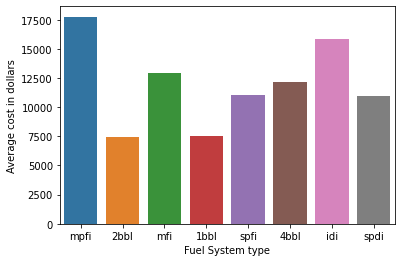

In [ ]:
sns.barplot(x= fuel_system_label ,y=fuel_system_average_price)
plt.xlabel('Fuel System type')
plt.ylabel("Average cost in dollars")
plt.show()

# Feature extraction and scaling

In [9]:
correlation = df.corr()
print(correlation['price'])

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64


In [ ]:
# Engine size depends on the vehicle price the most
df_corr = correlation['price'].tolist()

In [ ]:
correlation['price']>=0.70

car_ID              False
symboling           False
wheelbase           False
carlength           False
carwidth             True
carheight           False
curbweight           True
enginesize           True
boreratio           False
stroke              False
compressionratio    False
horsepower           True
peakrpm             False
citympg             False
highwaympg          False
price                True
Name: price, dtype: bool

In [10]:
# consider which is true
features = ['curbweight' ,'enginesize' , 'horsepower' , 'carwidth']

In [11]:
print(df['curbweight'].max())
print(df['curbweight'].min())

4066
1488


In [12]:
print(df['enginesize'].max())
print(df['enginesize'].min())

326
61


In [13]:
print(df['horsepower'].max())
print(df['horsepower'].min())

288
48


In [14]:
print(df['carwidth'].max())
print(df['carwidth'].min())

72.3
60.3


In [16]:
def min_max_scaler(x):
  x_min = x.min()
  x_max = x.max()
  return (x - x_min) / (x_max-x_min)


In [17]:
X = df[['curbweight', 'enginesize' , 'horsepower', 'carwidth']]

In [18]:
Y = df['price']

In [19]:
x_f1 = min_max_scaler(X['curbweight']).to_numpy()
x_f2 = min_max_scaler(X['enginesize']).to_numpy()
x_f3 = min_max_scaler(X['horsepower']).to_numpy()
x_f4 = min_max_scaler(X['carwidth']).to_numpy()

In [37]:
y = min_max_scaler(Y).to_numpy().reshape(-1 ,1)

In [21]:
X = np.vstack((x_f1 , x_f2 , x_f3 , x_f4))
print(X.shape)

(4, 205)


# Gradient descent

In [30]:
def gradient_descent(X, y , learning_rate , epochs):
  cost_history = []
  w = np.ones((X.shape[0] ,1))
  b = 0
  n = len(y)
  for epoch in range(epochs):
    hypothesis = np.dot(X.T , w) + b
    loss = y - hypothesis
    w_grad = (-2/n) * np.dot(X , loss)
    b_grad = (-2/n) * np.sum(y - hypothesis)
    w = w - (learning_rate * w_grad)
    b = b - (learning_rate * b_grad)
    cost = np.mean(np.square(y - hypothesis))
    cost_history.append(cost)
  return cost_history , w, b

In [39]:
history , w, b = gradient_descent(X , y , 0.01, 100)
print(history)

[1.571217282234709, 1.480771248635781, 1.3958040330129096, 1.3159830318034296, 1.2409958348686891, 1.1705489994812763, 1.104366898747744, 1.0421906399475964, 0.9837770485436846, 0.9288977138768577, 0.8773380927998174, 0.8288966677324797, 0.78338415583472, 0.7406227661929972, 0.7004455021057591, 0.6626955057295291, 0.6272254425138083, 0.5938969230090757, 0.5625799597788369, 0.533152457284431, 0.5054997327407044, 0.4795140660622056, 0.45509427713370854, 0.43214532874611566, 0.41057795363950256, 0.3903083041896749, 0.3712576233634752, 0.35335193565153544, 0.3365217567655782, 0.32070182096100336, 0.30583082491466895, 0.29185118715274266, 0.2787088220845255, 0.2663529277554656, 0.25473578648642736, 0.24381257761684114, 0.23354120161686848, 0.2238821148783292, 0.2147981745360449, 0.20625449271061852, 0.19821829960064105, 0.1906588148870462, 0.18354712694495368, 0.17685607938898065, 0.17056016450678219, 0.1646354231626109, 0.15905935077807937, 0.15381080902115749, 0.14886994285683677, 0.14421

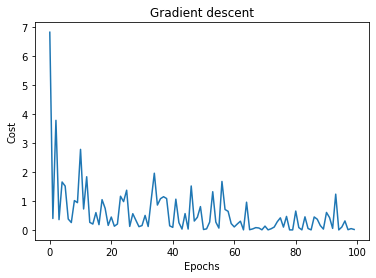

In [125]:
plt.plot(range(100) , history)
plt.title("Gradient descent")
plt.xlabel('Epochs')
plt.ylabel("Cost")
plt.show()

# Stochastic Gradient Descent

In [129]:
import random

In [130]:
def stochastic_gradient_descent(X, y , learning_rate , epochs):
  cost_history = []
  w = np.ones((X.shape[0] ,1))
  b = 0
  n = len(y)
  for epoch in range(epochs):
    rand = random.randint(0, len(y)-1)
    x_sample = X.T[rand].reshape(-1 , 1)
    y_sample = y[rand].reshape(-1 , 1)
    hypothesis = np.dot(x_sample.T , w) + b
    loss = y_sample - hypothesis
    w_grad = (-2/n) * np.dot(x_sample , loss)
    b_grad = (-2/n) * (y_sample - hypothesis)
    w = w - (learning_rate * w_grad)
    b = b - (learning_rate * b_grad)
    if epoch%100==0:
      cost = (y_sample - hypothesis) ** 2
      cost_history.append(float(cost))

  return cost_history , w, b

In [131]:
history , w, b = stochastic_gradient_descent(X , y , 0.01, 10000)
print(history)

[0.9463023835636318, 0.6609814999186023, 0.3745272747219562, 0.4149187543923233, 0.7350392390996251, 0.28371836556273516, 0.7940259953626604, 1.3354858213026097, 1.329366208677549, 7.288308021411741, 2.016018208131176, 0.241969376911884, 4.041701613406981, 2.5795907309467996, 0.6042334369661094, 0.36016469607621704, 0.7302785776819221, 0.5230121297021034, 0.34459511045294894, 1.396426859790062, 0.13476402121010975, 2.223146917262316, 0.18718177909825648, 1.6082924730470938, 0.5971755954759588, 0.9817801267746974, 1.665489224220199, 0.22209106969764605, 0.13363043396342816, 0.5290087559633501, 0.08829899479631899, 0.11253874011548365, 0.0795944055604877, 0.07730819799143748, 0.10689299290253346, 0.5219718053359389, 0.4352638115965948, 1.3005055226483129, 1.1059799399825316, 0.7683655857787653, 0.6385147559824701, 0.4511592284143484, 0.3302380322932758, 0.09620511321995426, 0.6778626924218493, 0.429230684099055, 0.250533022346122, 0.0720178246362146, 0.08160187513218461, 0.01809978985278

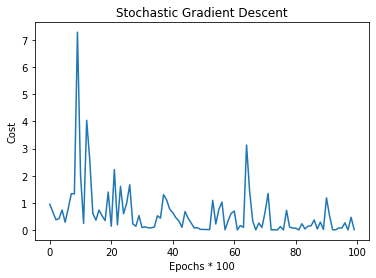

In [133]:
plt.plot(range(100), history)
plt.title("Stochastic Gradient Descent")
plt.xlabel("Epochs * 100")
plt.ylabel('Cost')
plt.show()

# Mini Batch Gradient Descent


In [178]:
def minbatch_gradient_descent(X, y , learning_rate , epochs, batch_size):
  cost_history = []
  w = np.ones((X.shape[0] ,1))
  b = 0
  n = len(y)
  if batch_size > n:
    batch_size = n
  for epoch in range(epochs):
    for i in range(0, n , batch_size):
      xt = X.T[i:i+batch_size]
      yt = y[i:i+batch_size]
      hypothesis = np.dot(xt , w) + b
      loss = yt - hypothesis
      w_grad = (-2/n) * np.dot(xt.T, loss)
      b_grad = (-2/n) * np.sum(yt - hypothesis)
      w = w - (learning_rate * w_grad)
      b = b - (learning_rate * b_grad)
      if epoch%10 == 0:
        cost = np.mean(np.square(yt - hypothesis))
        cost_history.append(cost)
  return cost_history , w, b

In [185]:
history , w, b = minbatch_gradient_descent(X , y , 0.01, 100 , 25)


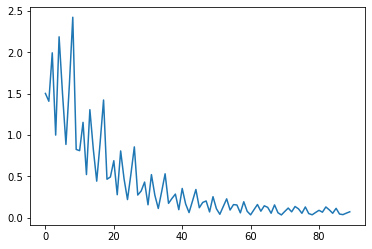

In [188]:
plt.plot(range(len(history)) , history)